In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [8]:
counts = {
    'provided': pd.read_table('rawdata/counts/counts.txt', index_col='gene_symbol'),
    'kallisto': pd.read_table('s2-expression.dir/kallisto-counts.txt', index_col='gene_symbol')
}

In [9]:
for key, value in counts.items():
    print(key)
    print(value.shape)

provided
(26362, 80)
kallisto
(35798, 80)


In [13]:
total_counts = pd.DataFrame({key: value.sum() for key, value in counts.items()})
total_counts.head()

provided  kallisto
h1   37477040  39980016
h10  39517729  42213097
h11  38282295  40819720
h12  36587209  39046503
h13  33821770  36236486

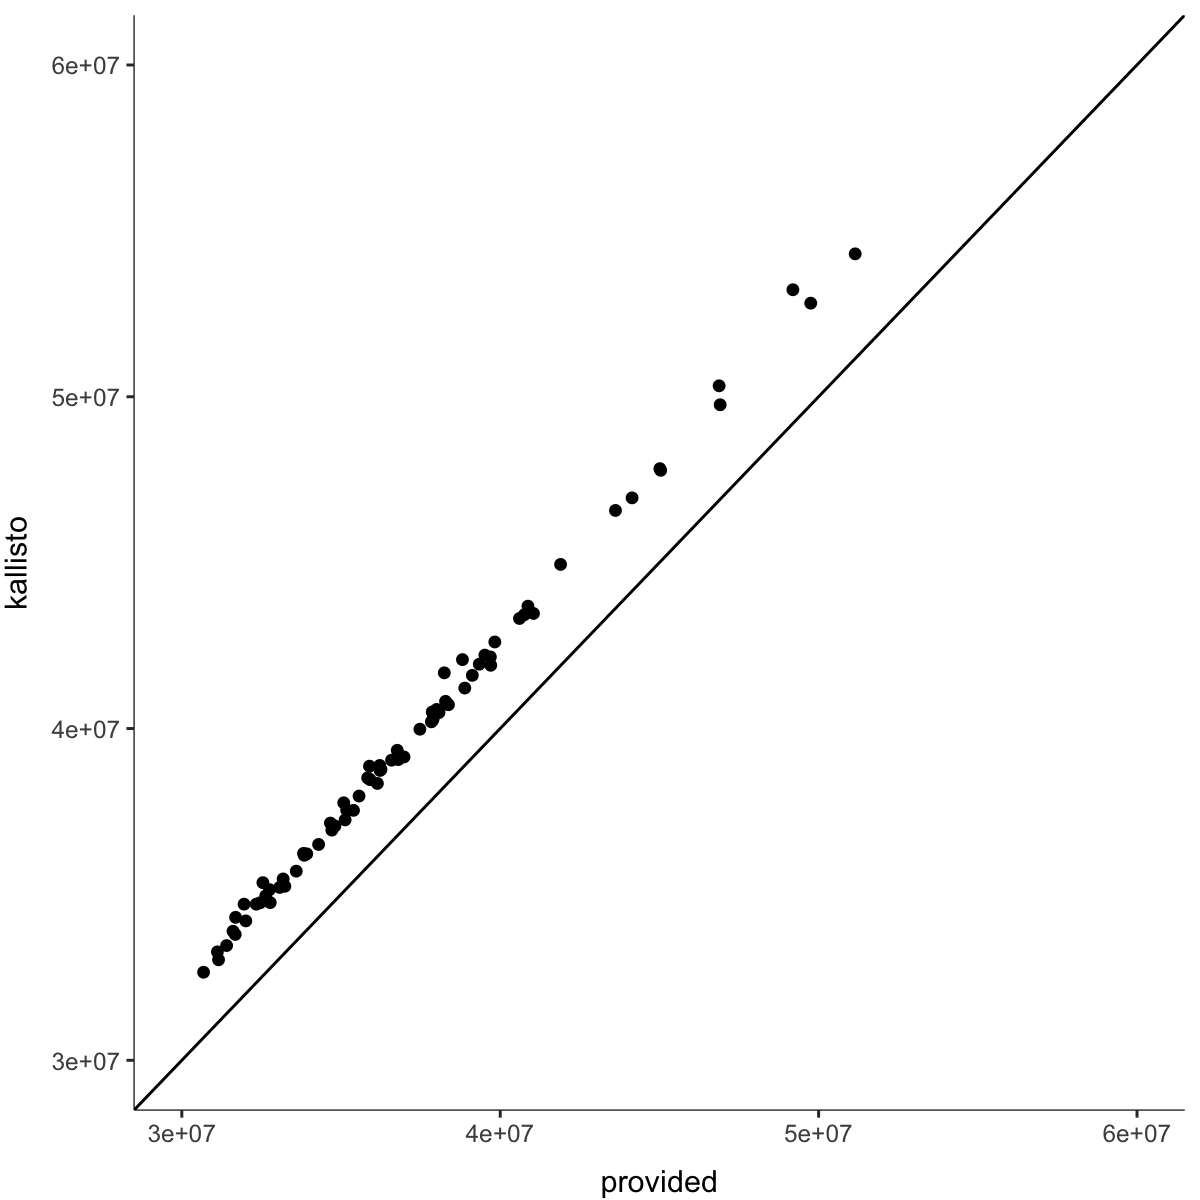

In [30]:
%%R -i total_counts -h 1200 -w 1200 -r 200
ticks <- seq(3,6)*10^7
ggplot(total_counts, aes(x=provided, y=kallisto)) +
geom_point() +
#facet_wrap(~, scales='free') +
#coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_x_log10() +
#scale_y_log10() +
scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks) +
scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks) +
#ggtitle('') +
geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
#labs(title = '', x = '', y = '', color = '', fill='') +
#guides(fill=FALSE) +
theme_classic() +
theme(axis.title.x = element_text(vjust=-1), axis.title.y = element_text(vjust=2.5), axis.line = element_line(colour = 'black', size=0.2), strip.background = element_rect(color='black', fill='white', size=0))

In [37]:
melted_counts = {key: pd.melt(value.reset_index(), id_vars='gene_symbol', value_name=key) for key, value in counts.items()}
melted_counts['provided'].head()

gene_symbol variable  provided
0     DDX11L1      h10         1
1      WASH7P      h10       335
2   MIR6859-3      h10         0
3   MIR6859-2      h10         0
4   MIR6859-4      h10         0

In [39]:
melted_count_dataframe = pd.merge(melted_counts['provided'], melted_counts['kallisto'], on=['gene_symbol', 'variable'])
print(melted_count_dataframe.shape)
melted_count_dataframe.head()

(1544000, 4)


gene_symbol variable  provided  kallisto
0     DDX11L1      h10         1         7
1      WASH7P      h10       335       119
2       OR4F5      h10         0         0
3       OR4F3      h10         0         0
4      OR4F29      h10         0         0

In [40]:
%R -i melted_count_dataframe

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



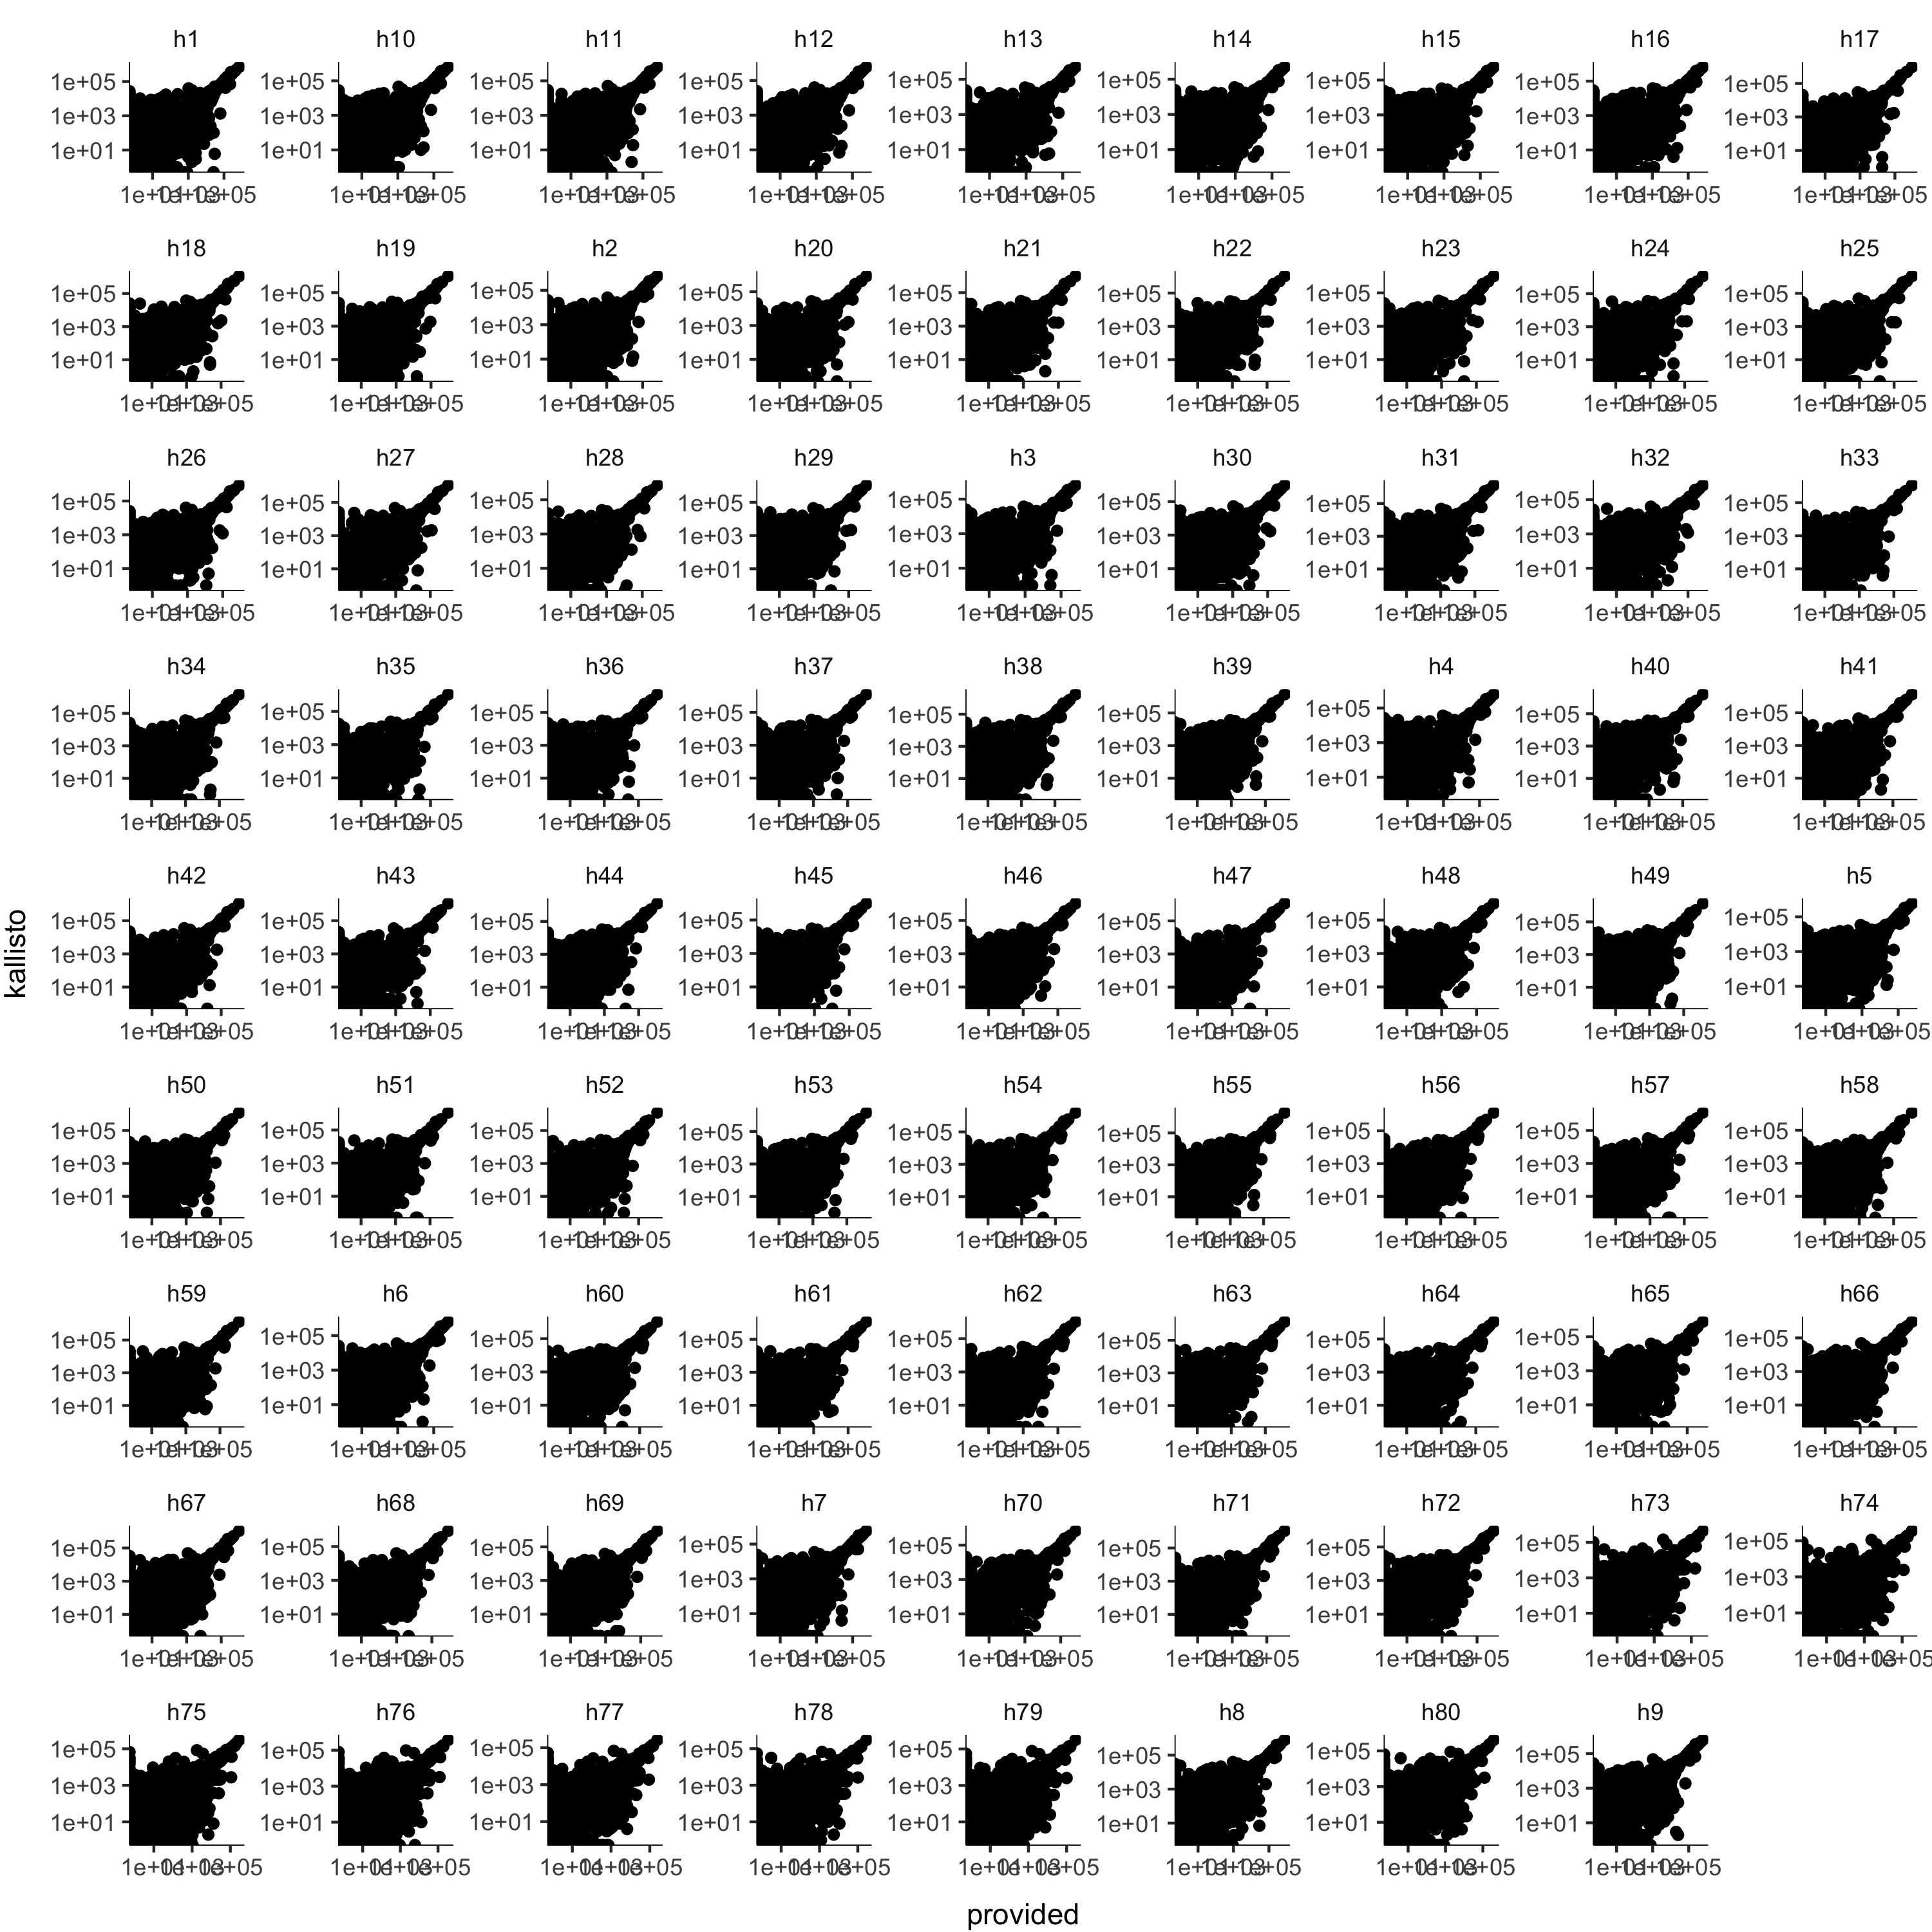

In [44]:
%%R -h 4000 -w 4000 -r 200
#ticks <- seq()
ggplot(melted_count_dataframe, aes(x=provided, y=kallisto)) +
geom_point() +
facet_wrap(~variable, scales='free') +
#coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
scale_x_log10() +
scale_y_log10() +
#scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#ggtitle('') +
#geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
#labs(title = '', x = '', y = '', color = '', fill='') +
#guides(fill=FALSE) +
theme_classic() +
theme(axis.title.x = element_text(vjust=-1), axis.title.y = element_text(vjust=2.5), axis.line = element_line(colour = 'black', size=0.2), strip.background = element_rect(color='black', fill='white', size=0))

In [48]:
index = set(counts['kallisto'].index).intersection(set(counts['provided'].index))
counts_reindex = {key: value.reindex(index) for key, value in counts.items()}

In [49]:
counts_reindex['kallisto'] 

h1   h10   h11   h12   h13   h14   h15   h16   h17   h18  \
gene_symbol                                                                
ZFYVE26       1829  2158  2026  2070  1732  1834  1916  2626  1493  1684   
C1orf116         1     0     1     7     0     0     5     2     0     5   
DCAF11        1522  1548  1763  1475  1528  1546  1594  1984  1076  1265   
BLOC1S1-RDH5   109   110   107    99   106    75    99   117   118    87   
UGT2B7           0     1     1     0     0     1     0     6     1     2   
TMEM125          0     0     0     0     0     0     0     0     0     0   
TMEM171         93   200   155   167   121   207   137   396   165   205   
PVRIG2P          0     0     0     0     0     4     0     0     0     0   
DDX20         1234  1204  1175  1228   951  1079   948  1131  1154  1304   
RNF25          756   827   833   861   645   731   739   962   631   698   
VBP1          2901  3306  3118  2923  2542  2922  2685  3393  2337  2950   
ALDH3B1        997  1071  1076   923  1426  1155  1520  1502   890  1127   
SLC40A1          3     9    10    21    10    15    14    11    11    18   
LRRC70           8     7     7    17    10     3     5     8     6     4   
PTPRQ            7    19    12     6    26    22    23    28   160   195   
PERP          2393  2969  2582  2837  2496  3059  2855  4237  3206  3853   
KLHL28         749   771   769   657   645   674   780   929   628   554   
PIWIL4         126    75    80    65    78    82    87   122    79   116   
SERP1         6254  6025  6002  5408  5139  4997  5543  6758  4074  4841   
ASCL4            0     0     0     0     0     0     0     0     0     0   
CAPG          3934  4274  4217  3915  4047  4285  4261  5578  1636  2047   
SEMA4B         303   437   327   503   403   457   429   681   207   189   
EXTL2         1492  1475  1385  1326  1452  1494  1461  2093  1099  1280   
TYMP           180   149   208   132   108   102   138   187   231   290   
SMIM6            2     4     6     7     2     7     1    11     2     3   
INO80         2058  1822  1881  1982  1764  1592  1644  2518  1747  1693   
OSGIN2        1392  1690  1560  1506  1335  1442  1328  1870  1079  1397   
FAM13A         650   726   658   630   653   706   722   956   419   528   
HOXB2          713  1065   991  1049   968  1061  1021  1442   593   949   
MS4A13           0     0     0     0     0     0     0     0     0     0   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
EPB41L4B        86   116   102   185    78   115    67   215    44    46   
JMJD4          543   497   601   544   420   474   431   737   316   366   
LY86             0     0     0     0     0     0     0     0     0     0   
TNF              0     0     0     0     0     0     0     0     0     0   
THRSP            0     1     0     0     0     0     1     1     0     1   
PRDM8          475   674   511   747   719   959   789  1166   425   580   
JPH4             0     4     0     1     0     0     0     0     1     1   
OR6V1            0     0     0     0     0     0     0     0     0     0   
ARID3C           3     9     5     6     7     1     6     7     4     6   
RHBDL3          16    25    15    21    22    27    15    14     9    29   
SOX9           676   628   748   811   507   664   613   877   257   348   
ARHGAP1       4125  4231  4452  3808  4113  4087  4400  5145  2916  3469   
FCGBP            2     6     3     5     2     2     2     1     2     1   
KAT8           722   689   748   705   503   599   621   838   475   547   
ING5          1091  1338  1220  1123   877  1054   986  1452   827   998   
POGK          2301  2753  2847  2642  2171  2392  2172  2834  2120  2404   
ART1             4     0     1     0     0     0     1     3     3     3   
PSORS1C1        18    45    38    49    27    34    41    60     6     2   
CCNY          4214  4011  4201  3986  3639  3962  3799  5166  2518  3107   
SLC25A41         3     1     7     2     4     7     2     4    

In [50]:
counts_reindex['provided']

h10   h11   h12   h13   h14   h15   h16   h17   h18   h19  \
gene_symbol                                                                
ZFYVE26       2086  1978  1999  1678  1779  1849  2542  1460  1640  1237   
C1orf116         0     1     7     0     0     5     2     0     5     0   
DCAF11        1558  1742  1466  1530  1554  1572  1983  1072  1258   926   
BLOC1S1-RDH5     0     0     0     0     0     0     0     0     0     0   
UGT2B7           1     0     0     0     0     0     0     0     0     0   
TMEM125          0     0     0     0     0     0     0     0     0     0   
TMEM171        203   153   169   121   208   133   402   164   205   169   
PVRIG2P          0     0     0     0     0     0     0     0     0     0   
DDX20         1180  1148  1189   929  1061   926  1095  1140  1285  1262   
RNF25          835   831   858   644   732   737   957   628   689   661   
VBP1          3285  3101  2916  2523  2910  2674  3377  2325  2932  2375   
ALDH3B1       1007   986   835  1328  1069  1418  1365   845  1056   781   
SLC40A1          9     9    20    10    15    15    11    11    18    18   
LRRC70           6     9    18    10     3    10     9     8     4     4   
PTPRQ           23    13     7    23    22    23    29   148   189   157   
PERP          3356  2959  3267  2915  3528  3299  4882  3539  4244  3256   
KLHL28         773   772   664   658   678   776   950   638   548   708   
PIWIL4          72    80    61    69    78    79   117    70   116   106   
SERP1         5864  5844  5270  4974  4874  5397  6562  3965  4724  4657   
ASCL4            0     0     0     0     0     0     0     0     0     1   
CAPG          4285  4196  3896  4031  4279  4239  5556  1634  2057  1534   
SEMA4B         434   325   498   389   448   424   677   203   191   150   
EXTL2         1407  1336  1268  1416  1443  1387  1988  1076  1233  1070   
TYMP            93   131    85    68    61    67   101   159   190   126   
SMIM6            6     4     7     2     7     2    14     2     1     2   
INO80         2149  2122  2126  1768  1869  1633  2547  1789  2014  2077   
OSGIN2        1683  1545  1487  1320  1428  1320  1852  1066  1384  1146   
FAM13A         474   419   427   408   437   468   598   254   338   328   
HOXB2         1015   953  1012   933  1020   999  1358   575   932   476   
MS4A13           0     0     0     0     0     0     0     0     0     0   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
EPB41L4B       116   101   178    75   111    67   215    43    45    42   
JMJD4           58    99    52    52    62    38    69    40    65    39   
LY86             0     0     0     0     0     0     0     0     0     0   
TNF              0     0     0     0     0     0     0     0     1     0   
THRSP            1     0     0     0     0     1     1     0     1     0   
PRDM8          693   507   745   708   956   788  1183   432   587   411   
JPH4             1     0     1     0     0     0     0     0     1     2   
OR6V1            0     0     0     0     0     0     0     0     0     0   
ARID3C           9     4     6     7     1     6     7     5     6     3   
RHBDL3          26    18    22    23    28    16    16    13    29    22   
SOX9           620   743   789   501   650   598   862   250   346   298   
ARHGAP1       4564  4761  4079  4409  4332  4657  5464  3180  3739  3246   
FCGBP            7     3     0     0     2     2     1     1     0    10   
KAT8           525   591   543   370   470   490   668   389   456   410   
ING5           793   695   622   557   664   623   878   600   693   612   
POGK          2442  2461  2275  1887  2144  1901  2513  1854  2077  1642   
ART1             0     1     0     0     0     1     3     6     3     5   
PSORS1C1         9    14    12    21    11    18    25     4     0     8   
CCNY          3988  4151  3952  3598  3917  3759  5135  2558  3167  2771   
SLC25A41         2     7     2     5    10     2     5     0   

In [54]:
import numpy as np

In [59]:
corr_dataframe = counts_reindex['kallisto'].corrwith(counts_reindex['provided']).rename('correlation').to_frame()
corr_dataframe.head()

correlation
h1      0.984308
h10     0.980431
h11     0.981290
h12     0.982442
h13     0.981421

In [61]:
corr_dataframe.min()

correlation    0.959144
dtype: float64